<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/mlp_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 6s 13ms/step - loss: 0.6806 - accuracy: 0.5553 - val_loss: 0.3302 - val_accuracy: 0.8568
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2387 - accuracy: 0.9075 - val_loss: 0.2861 - val_accuracy: 0.8864
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1088 - accuracy: 0.9680 - val_loss: 0.3427 - val_accuracy: 0.8764
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0313 - accuracy: 0.9936 - val_loss: 0.4485 - val_accuracy: 0.8704
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0046 - accuracy: 0.9998 - val_loss: 0.5264 - val_accuracy: 0.8692
Epoch 6/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5679 - val_accuracy: 0.8712
Epoch 7/100
176/176 [==============================] - 2s 11ms/step - loss: 4.5830e-04 - accuracy: 1.0000 - val_loss: 0

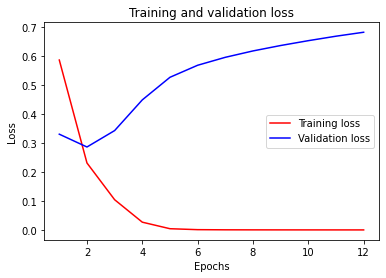

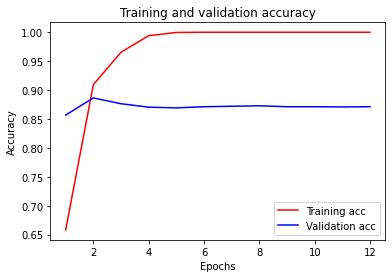

              precision    recall  f1-score   support

           0      0.880     0.878     0.879     12500
           1      0.878     0.880     0.879     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 2s 11ms/step - loss: 0.6455 - accuracy: 0.5987 - val_loss: 0.3086 - val_accuracy: 0.8732
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1928 - accuracy: 0.9274 - val_loss: 0.3227 - val_accuracy: 0.8680
Epoch 3/100
176/176 [==============================] - 2s 10ms/step - loss: 0.0614 - accuracy: 0.9842 - val_loss: 0.4269 - val_accuracy: 0.8624
Epoch 4/100
176/176 [==============================] - 2s 10ms/step - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.5103 - val_accuracy: 0.8608
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

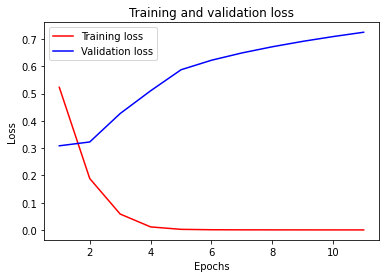

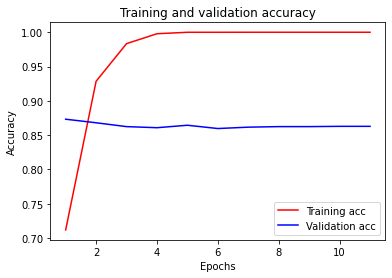

              precision    recall  f1-score   support

           0      0.873     0.865     0.869     12500
           1      0.867     0.874     0.870     12500

    accuracy                          0.870     25000
   macro avg      0.870     0.870     0.870     25000
weighted avg      0.870     0.870     0.870     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6030 - accuracy: 0.6386 - val_loss: 0.3182 - val_accuracy: 0.8688
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1776 - accuracy: 0.9362 - val_loss: 0.3133 - val_accuracy: 0.8760
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0504 - accuracy: 0.9897 - val_loss: 0.4019 - val_accuracy: 0.8660
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0093 - accuracy: 0.9994 - val_loss: 0.4999 - val_accuracy: 0.8632
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

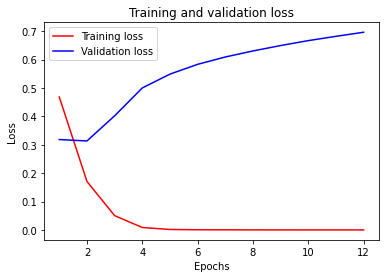

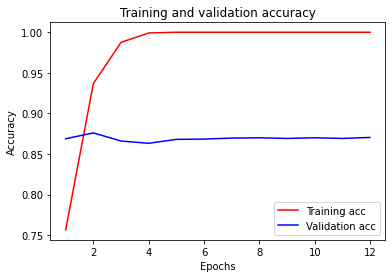

              precision    recall  f1-score   support

           0      0.865     0.879     0.872     12500
           1      0.877     0.863     0.870     12500

    accuracy                          0.871     25000
   macro avg      0.871     0.871     0.871     25000
weighted avg      0.871     0.871     0.871     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 2s 12ms/step - loss: 0.6578 - accuracy: 0.5762 - val_loss: 0.3035 - val_accuracy: 0.8748
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2113 - accuracy: 0.9169 - val_loss: 0.3127 - val_accuracy: 0.8728
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0769 - accuracy: 0.9784 - val_loss: 0.3945 - val_accuracy: 0.8680
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0156 - accuracy: 0.9981 - val_loss: 0.5115 - val_accuracy: 0.8692
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

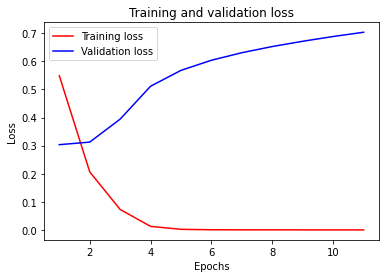

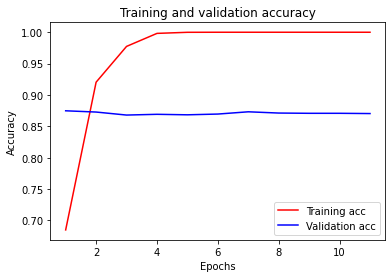

              precision    recall  f1-score   support

           0      0.879     0.854     0.867     12500
           1      0.858     0.883     0.870     12500

    accuracy                          0.868     25000
   macro avg      0.869     0.868     0.868     25000
weighted avg      0.869     0.868     0.868     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 2s 11ms/step - loss: 0.6846 - accuracy: 0.5356 - val_loss: 0.3465 - val_accuracy: 0.8416
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2354 - accuracy: 0.9066 - val_loss: 0.2918 - val_accuracy: 0.8736
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0814 - accuracy: 0.9791 - val_loss: 0.3862 - val_accuracy: 0.8604
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0168 - accuracy: 0.9971 - val_loss: 0.4911 - val_accuracy: 0.8596
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

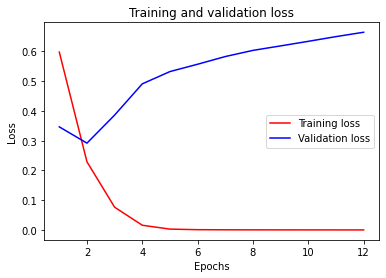

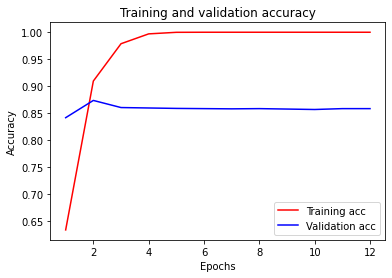

              precision    recall  f1-score   support

           0      0.877     0.868     0.873     12500
           1      0.870     0.878     0.874     12500

    accuracy                          0.873     25000
   macro avg      0.873     0.873     0.873     25000
weighted avg      0.873     0.873     0.873     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 2s 11ms/step - loss: 0.6124 - accuracy: 0.6232 - val_loss: 0.2943 - val_accuracy: 0.8788
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1778 - accuracy: 0.9360 - val_loss: 0.2963 - val_accuracy: 0.8836
Epoch 3/100
176/176 [==============================] - 2s 10ms/step - loss: 0.0562 - accuracy: 0.9862 - val_loss: 0.3750 - val_accuracy: 0.8728
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0110 - accuracy: 0.9988 - val_loss: 0.4656 - val_accuracy: 0.8700
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

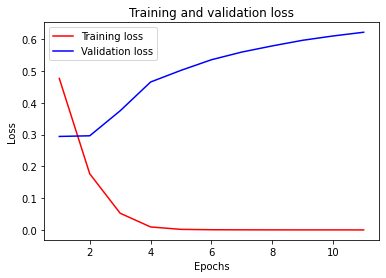

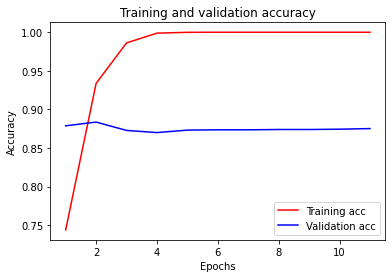

              precision    recall  f1-score   support

           0      0.856     0.898     0.876     12500
           1      0.892     0.849     0.870     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 2s 11ms/step - loss: 0.6159 - accuracy: 0.6252 - val_loss: 0.3061 - val_accuracy: 0.8708
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1727 - accuracy: 0.9373 - val_loss: 0.2978 - val_accuracy: 0.8828
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0517 - accuracy: 0.9882 - val_loss: 0.3748 - val_accuracy: 0.8752
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0099 - accuracy: 0.9993 - val_loss: 0.4789 - val_accuracy: 0.8724
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

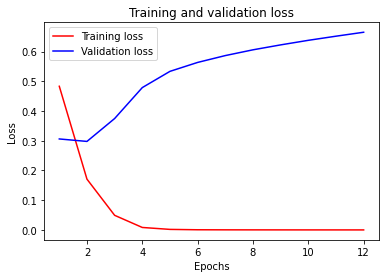

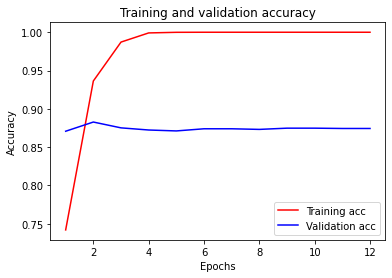

              precision    recall  f1-score   support

           0      0.873     0.871     0.872     12500
           1      0.872     0.874     0.873     12500

    accuracy                          0.872     25000
   macro avg      0.872     0.872     0.872     25000
weighted avg      0.872     0.872     0.872     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6854 - accuracy: 0.5483 - val_loss: 0.3462 - val_accuracy: 0.8584
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2526 - accuracy: 0.8970 - val_loss: 0.2856 - val_accuracy: 0.8880
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1059 - accuracy: 0.9666 - val_loss: 0.3476 - val_accuracy: 0.8716
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0280 - accuracy: 0.9947 - val_loss: 0.4534 - val_accuracy: 0.8672
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

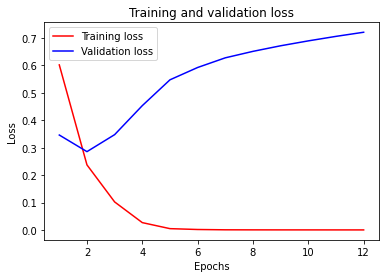

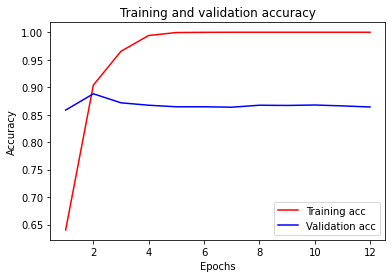

              precision    recall  f1-score   support

           0      0.879     0.873     0.876     12500
           1      0.874     0.880     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 12ms/step - loss: 0.6696 - accuracy: 0.5695 - val_loss: 0.3674 - val_accuracy: 0.8392
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2188 - accuracy: 0.9165 - val_loss: 0.2969 - val_accuracy: 0.8820
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0828 - accuracy: 0.9772 - val_loss: 0.3720 - val_accuracy: 0.8628
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0189 - accuracy: 0.9970 - val_loss: 0.4676 - val_accuracy: 0.8692
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0

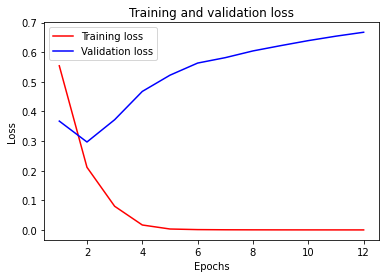

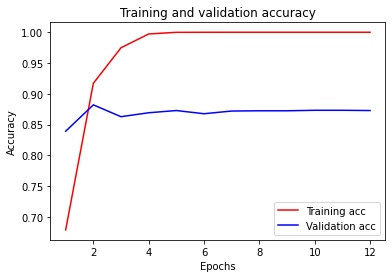

              precision    recall  f1-score   support

           0      0.876     0.873     0.875     12500
           1      0.873     0.877     0.875     12500

    accuracy                          0.875     25000
   macro avg      0.875     0.875     0.875     25000
weighted avg      0.875     0.875     0.875     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 2s 12ms/step - loss: 0.6172 - accuracy: 0.6218 - val_loss: 0.3055 - val_accuracy: 0.8660
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.1778 - accuracy: 0.9379 - val_loss: 0.3037 - val_accuracy: 0.8720
Epoch 3/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0520 - accuracy: 0.9873 - val_loss: 0.3762 - val_accuracy: 0.8676
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0105 - accuracy: 0.9990 - val_loss: 0.4608 - val_accuracy: 0.8740
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.

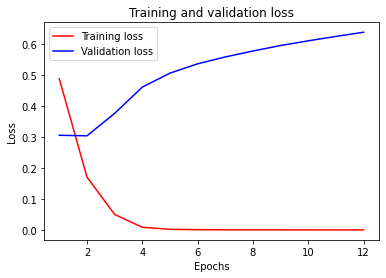

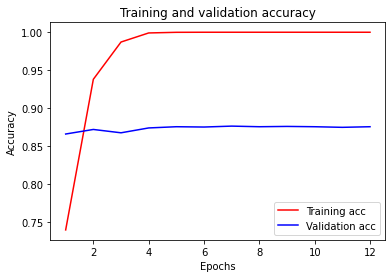

              precision    recall  f1-score   support

           0      0.867     0.876     0.872     12500
           1      0.875     0.866     0.870     12500

    accuracy                          0.871     25000
   macro avg      0.871     0.871     0.871     25000
weighted avg      0.871     0.871     0.871     25000


Average accuracy: 0.8729 (+/- 0.0030)
Average loss: 0.3030 (+/- 0.0095)
Average F1: 0.8728 (+/- 0.0031)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()

  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_valid, y=y_valid, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
